In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("credit_risk_dataset.csv")
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
# statistical highlights
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
# Null values
# 895 missing in emp_length and 3116 missing in int_rate of the loan
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### handle the missing values 

In [9]:
# Handle missing values
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].mean())

In [10]:
# All missing values handled
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

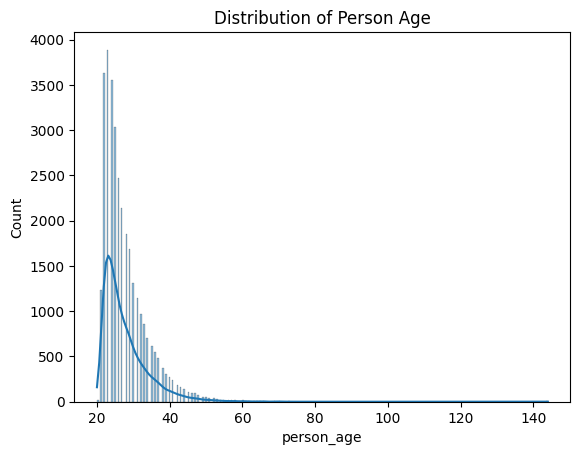

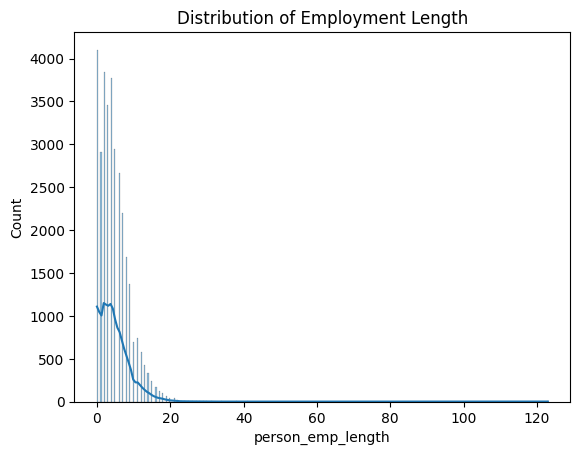

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for 'person_age' and 'person_emp_length'
sns.histplot(data['person_age'], kde=True)
plt.title('Distribution of Person Age')
plt.show()

sns.histplot(data['person_emp_length'], kde=True)
plt.title('Distribution of Employment Length')
plt.show()

In [12]:
data.shape

(32581, 12)

In [13]:
# Calculate IQR for person_age and person_emp_length
Q1_age = data['person_age'].quantile(0.25)
Q3_age = data['person_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_emp = data['person_emp_length'].quantile(0.25)
Q3_emp = data['person_emp_length'].quantile(0.75)
IQR_emp = Q3_emp - Q1_emp

# Define the lower and upper bounds for age and employment length
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

lower_bound_emp = Q1_emp - 1.5 * IQR_emp
upper_bound_emp = Q3_emp + 1.5 * IQR_emp

# Remove outliers from the dataset
df = data[
    (data['person_age'] >= lower_bound_age) & (data['person_age'] <= upper_bound_age) &
    (data['person_emp_length'] >= lower_bound_emp) & (data['person_emp_length'] <= upper_bound_emp)
]

# Check the new dataset size after removing outliers
df.shape

(30392, 12)

#### Encode categorical variables

In [14]:
# Encode categorical variables
# converting categotrical variables into numeric features 
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

### Split features and target

In [83]:
# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

### Split the data into training and testing sets

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the features

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train the model

In [16]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Make predictions

In [17]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

### Classification Report 

In [18]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4769
           1       0.96      0.74      0.84      1310

    accuracy                           0.94      6079
   macro avg       0.95      0.87      0.90      6079
weighted avg       0.94      0.94      0.93      6079



This classification report shows that our model performs well:

For class 0 (non-default loans): 93% precision, 99% recall, and 96% F1-score.
For class 1 (default loans): 96% precision, 74% recall, and 84% F1-score.
Overall accuracy: 94%
The model is better at identifying non-default loans (class 0) than default loans (class 1). This is common in credit risk models due to class imbalance.

### Confusion Matrix

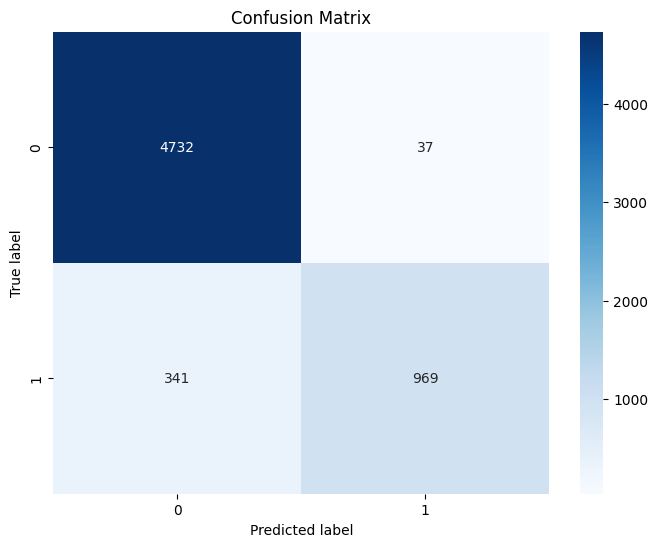

In [19]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# This visual representation shows:

#True Negatives (correctly predicted non-defaults)
#False Positives (incorrectly predicted defaults)
#False Negatives (incorrectly predicted non-defaults)
#True Positives (correctly predicted defaults)"""

### Feature Importance 

In [20]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

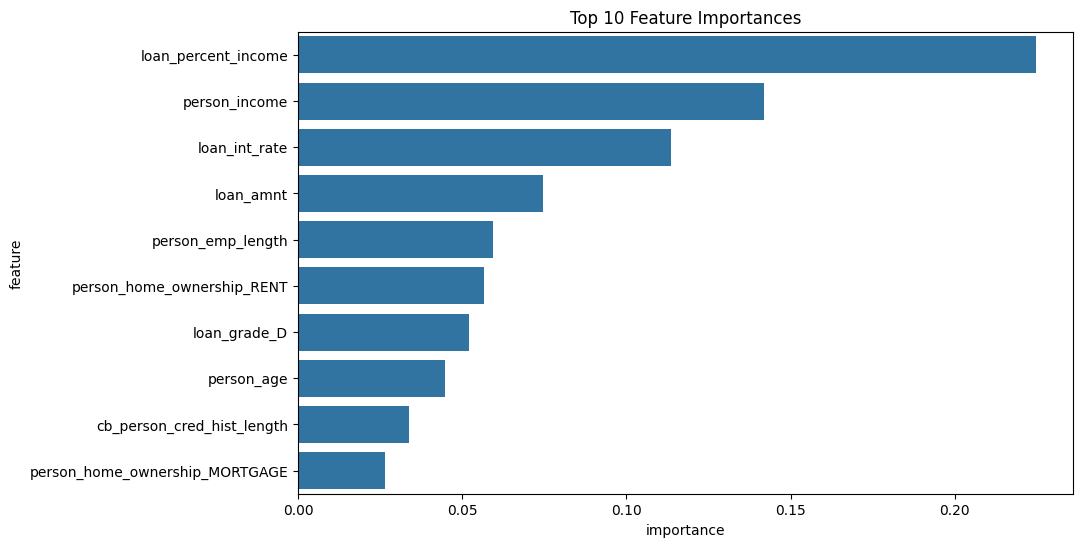

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.show()

This chart shows the top 10 most important features in predicting credit risk. The most influential features appear to be related to the loan amount, interest rate, and the person's income.

Overall, the model performs well with a 93% accuracy rate. However, there's room for improvement, especially in identifying default loans (class 1).

To enhance the model, we could consider:

Addressing class imbalance: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weights.
Feature engineering: Create new features or transform existing ones to capture more information.
Hyperparameter tuning: Use techniques like GridSearchCV to find the optimal parameters for the Random Forest model.
Trying other algorithms: Compare the performance with other models like Gradient Boosting or Logistic Regression.

## Apply SMOTE to balance the dataset.

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [23]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [24]:
# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 1, 0.5],
    'max_depth': [4, 6, 8, None],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy']
}

In [25]:
# Initialize the Random Forest model
rf_model_tuned = RandomForestClassifier(random_state=42)

## Perform hyperparameter tuning using GridSearchCV.

In [27]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', 1, 0.5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [28]:
# Fetch the best parameters
best_params = grid_search.best_params_

In [29]:
# Train the model with the best parameters
rf_model_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    random_state=42
)
rf_model_best.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)

In [30]:
# Make predictions with the improved model
y_pred_best = rf_model_best.predict(X_test_scaled)

In [31]:
# Print classification report of the improved model
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4769
           1       0.91      0.76      0.82      1310

    accuracy                           0.93      6079
   macro avg       0.92      0.87      0.89      6079
weighted avg       0.93      0.93      0.93      6079



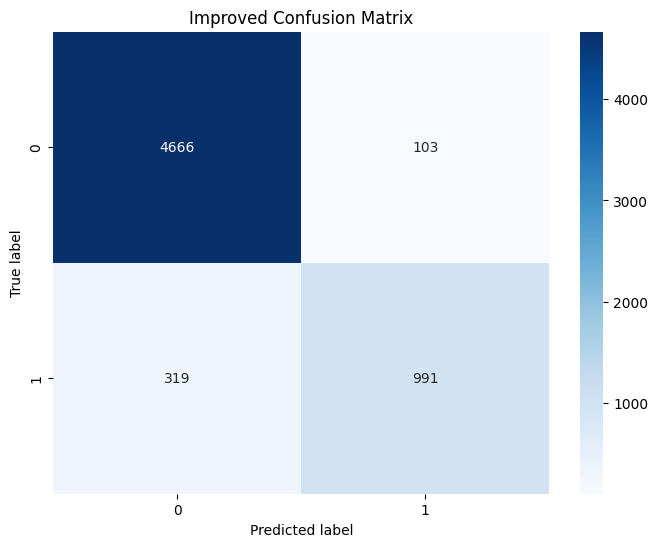

In [32]:
# Create and show updated confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Improved Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
# Print best parameters
print('Best parameters found:', best_params)

Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}


Code Explanation:
This code snippet applies SMOTE for class balancing, performs hyperparameter tuning on a Random Forest model using GridSearchCV,
and evaluates the model's performance with a classification report and confusion matrix.

In [34]:
# Display a few predictions with their true labels
for i in range(20):  # Display first 10 predictions
    print(f'True label: {y_test.iloc[i]}, Predicted: {y_pred_best[i]}')

True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 1, Predicted: 1
True label: 0, Predicted: 0
True label: 0, Predicted: 1
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 1, Predicted: 1
True label: 1, Predicted: 1
True label: 1, Predicted: 1
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 0, Predicted: 0
True label: 1, Predicted: 1


In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Use the outlier-free dataset (df_no_outliers)
X = df.drop('loan_status', axis=1)  # Drop the target column
y = df['loan_status']  # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0, 0.1, 0.3],
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                       n_iter=50, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV on the training data
random_search_xgb.fit(X_train_scaled, y_train)

# Get the best model from the tuning
best_xgb = random_search_xgb.best_estimator_

# Make predictions and evaluate the model
y_pred_xgb = best_xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

# Output the best hyperparameters
print("Best hyperparameters found for XGBoost: ", random_search_xgb.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost Test Accuracy: 0.9396
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4769
           1       0.97      0.75      0.84      1310

    accuracy                           0.94      6079
   macro avg       0.95      0.87      0.90      6079
weighted avg       0.94      0.94      0.94      6079

Best hyperparameters found for XGBoost:  {'subsample': 1, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1}


In [36]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Use the outlier-free dataset (df_no_outliers)
X = df.drop('loan_status', axis=1)  # Drop the target column
y = df['loan_status']  # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Define the hyperparameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [20, 31, 40],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'min_child_weight': [1, 3, 5],
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid_lgb,
                                       n_iter=50, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV on the training data
random_search_lgb.fit(X_train_scaled, y_train)

# Get the best model from the tuning
best_lgb = random_search_lgb.best_estimator_

# Make predictions and evaluate the model
y_pred_lgb = best_lgb.predict(X_test_scaled)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Test Accuracy: {accuracy_lgb:.4f}")
print(classification_report(y_test, y_pred_lgb))

# Output the best hyperparameters
print("Best hyperparameters found for LightGBM: ", random_search_lgb.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 5363, number of negative: 18950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 24313, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220582 -> initscore=-1.262280
[LightGBM] [Info] Start training from score -1.262280
LightGBM Test Accuracy: 0.9405
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4769
           1       0.98      0.74      0.84      1310

    accuracy                           0.94      6079
   macro avg       0.96      0.87      0.90      6079
weighted avg       0.94      0.94      0.94      6079

Best hyperparameters fou

LightGBM:
Accuracy: 94.05%
Precision (Class 1): 98%
Recall (Class 1): 74%
F1-score (Class 1): 84%
Best Hyperparameters:
subsample: 0.7
num_leaves: 20
n_estimators: 200
min_child_weight: 1
max_depth: 10
learning_rate: 0.05
colsample_bytree: 1
XGBoost:
Accuracy: 93.96%
Precision (Class 1): 97%
Recall (Class 1): 75%
F1-score (Class 1): 84%
Best Hyperparameters:
subsample: 1
n_estimators: 300
min_child_weight: 3
max_depth: 7
learning_rate: 0.05
gamma: 0
colsample_bytree: 1
Key Insights:
Both models perform similarly in terms of accuracy (~94%).
LightGBM slightly outperforms XGBoost in terms of overall accuracy.
Precision is higher for LightGBM (98%) than XGBoost (97%).
Both models have the same F1-score (84%), indicating similar performance in balancing precision and recall.
LightGBM tends to be faster than XGBoost due to its design, so if training time is a factor, LightGBM could be preferable.
Best Model: LightGBM
Although both models are performing at a similar level, LightGBM has a slight edge in accuracy and precision. Lets consider CATBOOST NEXT. 

In [15]:
import sklearn
sklearn.__version__


'1.5.2'

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

# Define feature columns (excluding 'loan_status')
X = df.drop('loan_status', axis=1)

# Define target column ('loan_status')
y = df['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features (optional but recommended for some models)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use during prediction in the Django app
joblib.dump(scaler, 'scaler.pkl')

# Initialize the CatBoost model
catboost_model = CatBoostClassifier(
    random_state=42,
    iterations=1000,
    learning_rate=0.05,
    depth=7,
    verbose=100  # To show progress while training
)

# Train the CatBoost model
catboost_model.fit(X_train_scaled, y_train)

# Save the trained model
catboost_model.save_model('catboost_model.cbm')

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Test Accuracy: {accuracy_catboost:.4f}")
print(classification_report(y_test, y_pred_catboost))

0:	learn: 0.6387867	total: 186ms	remaining: 3m 5s
100:	learn: 0.2062152	total: 2.67s	remaining: 23.7s
200:	learn: 0.1890406	total: 4.86s	remaining: 19.3s
300:	learn: 0.1727562	total: 7.27s	remaining: 16.9s
400:	learn: 0.1609062	total: 9.51s	remaining: 14.2s
500:	learn: 0.1508727	total: 11.7s	remaining: 11.6s
600:	learn: 0.1411587	total: 13.9s	remaining: 9.2s
700:	learn: 0.1331473	total: 16s	remaining: 6.83s
800:	learn: 0.1257190	total: 18.4s	remaining: 4.57s
900:	learn: 0.1190827	total: 20.7s	remaining: 2.27s
999:	learn: 0.1128733	total: 23s	remaining: 0us
CatBoost Test Accuracy: 0.9428
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4769
           1       0.97      0.76      0.85      1310

    accuracy                           0.94      6079
   macro avg       0.95      0.88      0.91      6079
weighted avg       0.94      0.94      0.94      6079



In [17]:
# Save the CatBoost model
catboost_model.save_model('catboost_model.cbm')

In [18]:
from catboost import CatBoostClassifier

# Load the saved model
loaded_catboost_model = CatBoostClassifier()
loaded_catboost_model.load_model('catboost_model.cbm')

# Make predictions with the loaded model
y_pred_catboost = loaded_catboost_model.predict(X_test_scaled)
